In [4]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [5]:
from LoadMultiFiles import LoadOneFileUproot
from copy import copy
filter_leaves = ['xyz_center', 'step_x', 'step_y', 'step_z',  'step_Edep', 'step_Equench', 'step_KineticE']

template_root_path = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/alpha_5cm/root/4000MeV_{}_120.root"
dir_PMT_diff_near_PMT = {}
for i in range(1, 30, 3):
    dir_PMT_diff_near_PMT[i] = LoadOneFileUproot(template_root_path.format(i), name_branch="PMT_log", return_list=False, list_branch_filter=filter_leaves)

645.1138385823946 0 4.515796870076762e-06
487.86891876978416 0 3.415082431388489e-06
710.5430268669295 0 4.9738011880685065e-06
769.4002587294829 0 5.385801811106381e-06
658.3584640721349 0 4.608509248504945e-06
510.4829381018366 0 3.5733805667128566e-06
635.3610235948006 0 4.447527165163604e-06
554.3069695788884 0 3.880148787052219e-06
360.69728223434583 0 2.5248809756404207e-06
458.36137155945306 0 3.2085296009161717e-06
476.16842773629094 0 3.3331789941540367e-06
480.48794421761164 0 3.3634156095232817e-06
360.97063611010145 0 2.52679445277071e-06
564.6221981987767 0 3.952355387391437e-06
687.5734113710776 0 4.813013879597543e-06
539.5967186889 0 3.7771770308222995e-06
693.1129371464673 0 4.851790560025271e-06
670.4100385360358 0 4.692870269752251e-06
450.73949390919165 0 3.1551764573643414e-06
532.790126105328 0 3.729530882737296e-06
488.86547745811714 0 3.42205834220682e-06
507.91547446402274 0 3.5554083212481594e-06
474.2754591467749 0 3.3199282140274246e-06
672.2165032565421 0 4

Text(0.5, 1.0, 'Different Distance of near PMT from LS')

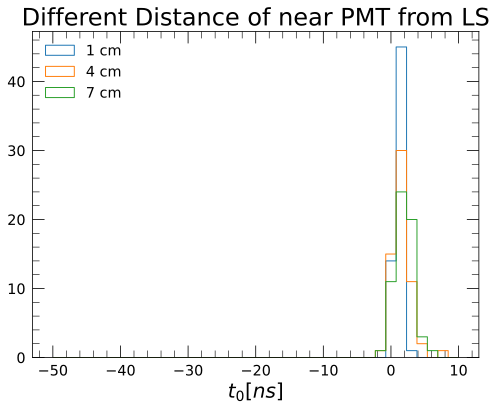

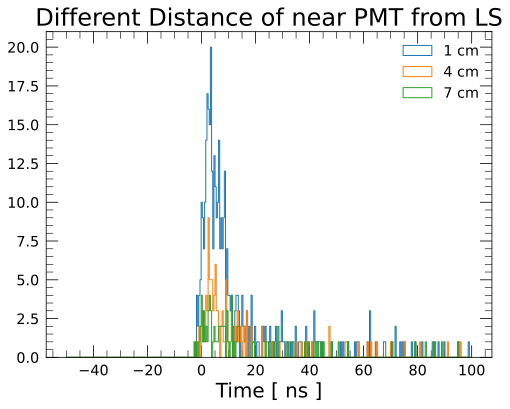

In [8]:
from importlib import reload
import PMTToyMC
reload(PMTToyMC)
from PMTToyMC import PMTToyMC

from HistTools import GetBinCenter

pmt_toy_mc = PMTToyMC()
plt.figure("Time Distribution")
plt.figure("t0 Distribution")
for i in range(1, 10,3):
    v_t0 = []
    for j,v_t in enumerate(dir_PMT_diff_near_PMT[i]["step_t"]):
        # plt.hist(v_t, bins=np.linspace(-100,100,400),histtype="step")
        v_t = v_t[v_t<1500]
        v_t = pmt_toy_mc.ToyMC(v_t)
        if j == 1:
            plt.figure("Time Distribution")
            h_time = plt.hist(v_t, bins=np.linspace(-50,100,350),histtype="step", label=f"{i} cm")
        else:
            h_time = np.histogram(v_t, bins=np.linspace(-50,100,350))

        # Get t0 distribution
        # print(np.where(h_time[0]>max(h_time[0])*0.3))
        v_t0.append(GetBinCenter(h_time[1])[np.where(h_time[0]>max(h_time[0])*0.7)[0][0]])

    plt.figure("t0 Distribution")
    plt.hist(v_t0, bins=np.linspace(-50,10,40), histtype="step", label=f"{i} cm")

plt.title("Different Distance of near PMT from LS")
plt.legend(loc="upper left")
plt.xlabel("$t_0 [ ns ]$")

plt.figure("Time Distribution")
plt.legend()
plt.xlabel("Time [ ns ]")
plt.title("Different Distance of near PMT from LS")